In [1]:
import pygco
import numpy as np
import cv2
from PIL import Image
from pylab import *
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
DIST_NUM = 45
mLambda = 10

In [19]:
# generate a number of disparities as labels
def setDisparities(imgWidth, nDist):
    distStep = int(imgWidth/nDist)
    dists = np.array(range(0, imgWidth, distStep))
    for eachDist in dists:
        if(eachDist!=0):
            eachDist-=1
    return dists

In [20]:
# generate color for each disparity

In [21]:
def getDist(d, Tx):
    # d is the RGB value of a certain position
    # Tx is source or sink labels that are already tranformed by T(x) to the RGB domain
    return np.linalg.norm(d-Tx)

In [22]:
# def searchOnEpipolarLine(leftNodeRGB, epiLine, dists):
    
#     return unaryCosts

In [23]:
def buildGraphFromImages(img1, img2, dists):
    imgHeight = img1.shape[0] # range of vertical rows
    imgWidth = img1.shape[1] # range of horizontal columns
    
    nDists= dists.shape[0]
#     print(nDists)
    # get prior term matrix/ pairwiseCost:
    pairwiseCost = np.zeros((nDists, nDists))
    for i in range(0, nDists):
        for j in range(0, nDists):
            pairwiseCost[i][j] = getDist(dists[i], dists[j])
    
    # get data term: edges, edgeWeights, unaryCosts
    nNodes = imgHeight*imgWidth
    nEdges = (2*imgHeight*imgWidth-imgHeight-imgWidth)
    
    edges = np.zeros((nEdges, 2))
    edgeWeights = np.ones((nEdges))
    unaryCosts = np.zeros((nNodes, nDists))
    
    # r for row and c for column of a image
    edgeIndex = 0;
    for r in range(0, imgHeight):
        for c in range(0, imgWidth):
            # get edges and weights from current node to right next node and bottom next node:
            nodeNo = r*imgWidth+c
            rightNodeNo = nodeNo+1
            bottomNodeNo = nodeNo+imgWidth
            if(rightNodeNo < nNodes and c < imgWidth-1):
                edges[edgeIndex,:] = np.array([nodeNo, rightNodeNo])
                edgeIndex+=1
            if(bottomNodeNo < nNodes and r < imgHeight-1):
                edges[edgeIndex,:] = np.array([nodeNo, bottomNodeNo])
                edgeIndex+=1
            # get unary costs/ data term array:
            leftNodeRGB = img1[r][c]
            unariesForThisLeftNode = []
            for i in range(0, nDists):
                dist = dists[i]
                rightNodeRGB = img2[r][int((c+dist-1)%imgWidth)]
                unariesForThisLeftNode.append(getDist(leftNodeRGB, rightNodeRGB))
#             for i in range(0, nDists):
#                 dist = dists[i]
#                 if(c+dist<imgWidth):
#                     rightNodeRGB = img2[r][(c+dist)]
#                     unariesForThisLeftNode.append(getDist(leftNodeRGB, rightNodeRGB))
#                 else:
#                     break
#             for i in range(0, nDists):
#                 dist = dists[i]
#                 if(c-dist > 0):
#                     rightNodeRGB = img2[r][(c-dist)]
#                     unariesForThisLeftNode.append(getDist(leftNodeRGB, rightNodeRGB))
#                 else:
#                     break
            unaryCosts[nodeNo,:] = np.array(unariesForThisLeftNode)

    return edges, edgeWeights, unaryCosts, pairwiseCost

In [24]:
# form a image from lables:
def formImg(orgImg, labels):
    imgHeight = orgImg.shape[0]
    imgWidth = orgImg.shape[1]
    output = np.zeros((imgHeight, imgWidth, 1))
    grayScaleStep = 255/labels.shape[0]
    for r in range(0, imgHeight):
        for c in range(0, imgWidth):
            label = labels[r*imgWidth+c]
            output[r][c] = label*grayScaleStep
    return output

In [25]:
leftImg = cv2.imread('im2.png')
leftImg = cv2.cvtColor(leftImg, cv2.COLOR_BGR2RGB)
rightImg = cv2.imread('im6.png')
rightImg = cv2.cvtColor(rightImg, cv2.COLOR_BGR2RGB)

In [26]:
dists = setDisparities(leftImg.shape[1], DIST_NUM)
print(dists)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440]


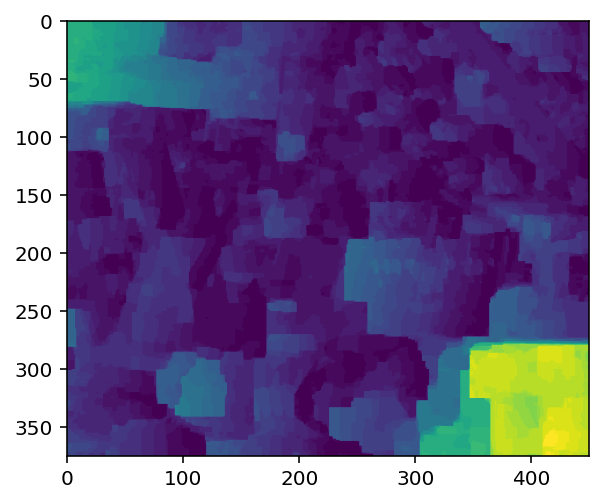

In [10]:
edges, edgeWeights, unaryCosts, pairwiseCost  = buildGraphFromImages(leftImg, rightImg, dists)
labels = pygco.cut_general_graph(edges, mLambda*edgeWeights, unaryCosts, pairwiseCost, n_iter=10)
output = formImg(leftImg, labels)
plt.imshow(output/255)
plt.show()

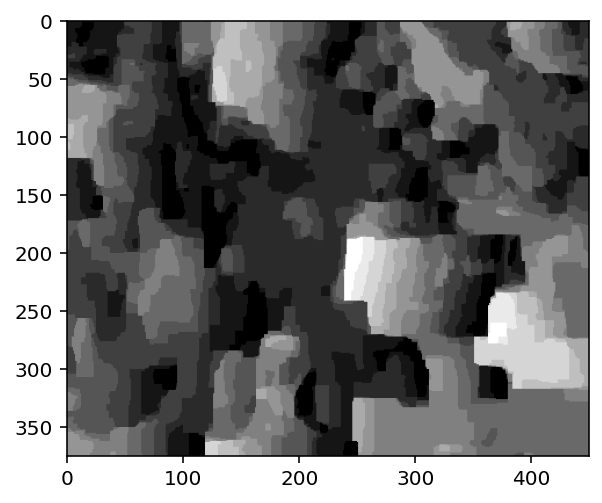

In [29]:
edges, edgeWeights, unaryCosts, pairwiseCost  = buildGraphFromImages(leftImg, rightImg, dists)
labels = pygco.cut_general_graph(edges, mLambda*edgeWeights, unaryCosts, pairwiseCost)
output = formImg(leftImg, labels)
plt.imshow(output/255, cmap = "gray")
# plt.show()

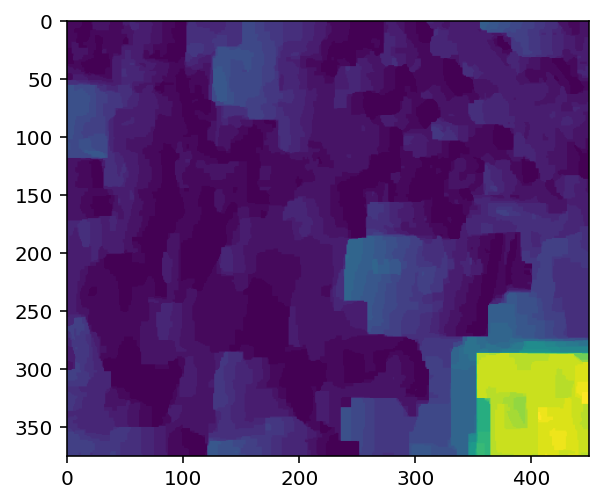

In [11]:
mLambda = 15
edges, edgeWeights, unaryCosts, pairwiseCost  = buildGraphFromImages(leftImg, rightImg, dists)
labels = pygco.cut_general_graph(edges, mLambda*edgeWeights, unaryCosts, pairwiseCost, n_iter=10)
output = formImg(leftImg, labels)
plt.imshow(output/255)
plt.show()

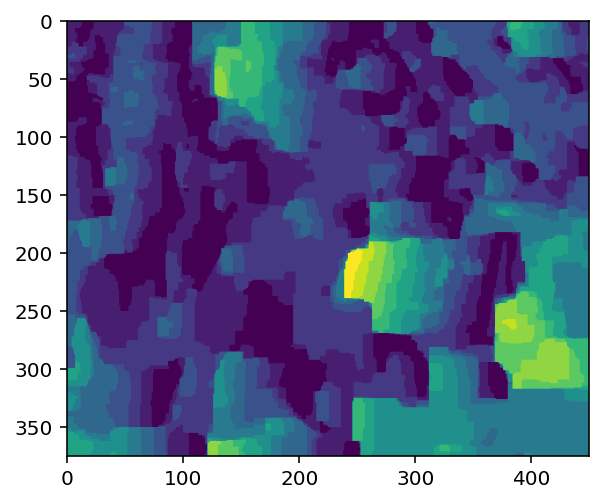

In [12]:
mLambda = 20
edges, edgeWeights, unaryCosts, pairwiseCost  = buildGraphFromImages(leftImg, rightImg, dists)
labels = pygco.cut_general_graph(edges, mLambda*edgeWeights, unaryCosts, pairwiseCost, n_iter=10)
output = formImg(leftImg, labels)
plt.imshow(output/255)
plt.show()

In [13]:
# print(pairwiseCost)

In [14]:
# print(unaryCosts)

In [15]:
# labels = pygco.cut_general_graph(edges, mLambda*edgeWeights, unaryCosts, pairwiseCost, n_iter=10)

In [16]:
# print(labels)

In [17]:
# output = formImg(leftImg, labels)
# plt.imshow(output/255)
# plt.show()